<center>
# Pandas, Matplotlib exercise
</center>
**Due** : 2018-03-13 20:29:59

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> **Warning**

> * <font color='red'> Do not use other packages except for `numpy`, `pandas`, `matplotlib` </font>

> * <font color='red'> Do not modify other code except for `YOUR CODE HERE` </font>

## Problem 1

(1) 연초부터 1년간 투자할 때 연말에 발생하는 수익금액의 분포가 평균 0, 표준편차 1의 정규분포인 투자안이 있다. 이 투자안을 10년간 매년 반복 투자했을 때, 10년 뒤 투자수익금액의 합계를 몬테카를로 시뮬레이션으로 생성할 수 있다. 이를 N(=100000)회  반복한 결과의 평균과 표준편차를 계산하고 출력하시오.

> **Warning**

> * <font color='red'> for문이나 while문을 사용하지 말고 numpy, pandas, matplotlib 패키지만 사용하시오 </font>

In [4]:
def invest_sim(N=100000):
    payoff_array=np.random.randn(10,N)
    payoff_array= payoff_array.sum(axis=0)
    return payoff_array

In [5]:
payoff_array = invest_sim()
print('AVG : ' + str(payoff_array.mean()))
print('STD : ' + str(payoff_array.std()))

AVG : 0.013509882171009091
STD : 3.1470965359312935


(2) 위의 투자안에 매년 투자를 유지하다가 (최대 100년) 연말에 누적 투자 수익이 2 이상 손실이면 폐업할 계획이다. 사업 유지 기간(년)을 몬테카를로 시뮬레이션으로 구하고 히스토그램(bin 개수 = 100)으로 도시하시오. 그리고 100년간 살아남은 경우의 개수를 출력하시오. (N=100000)

> **Warning**

> * <font color='red'> for문이나 while문을 사용하지 말고 numpy, pandas, matplotlib 패키지만 사용하시오 </font>


In [6]:
#w조건을 만족시키는 값 찾는 method-np.where()

def invest_survive(N=100000, T=100):
    x=np.random.normal(loc=0, scale=1, size=(N,T))
    a=np.where(x<=-2,0,x)
    b=a.cumprod(axis=1)
    survival_period_array=np.count_nonzero(b,axis=1)
    return survival_period_array

def count_survive(survival_period_array):
    b=np.where(survival_period_array==100,1,0)
    count=np.count_nonzero(b)
    return count

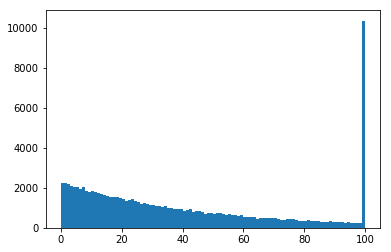

In [7]:
survival_period_array = invest_survive()
plt.hist(survival_period_array, bins=100)
plt.show()

In [8]:
print('number of survive 100 years : %d'%(count_survive(survival_period_array)))

number of survive 100 years : 10143


## Problem 2

Plain-vanilla 옵션의 블랙-숄즈 이론가격을 계산하는 함수를 구현하시오.

**Black-Scholes 옵션 가격 공식:**
$$
    C = Se^{-qt}N(d_1) - Ke^{-rt}N(d_2) \\
    P = Ke^{-rt}N(-d_2) - Se^{-qt}N(-d_1) 
$$
where
$$
    d_1 = \frac{\log{(\frac{S}{K})} + \left(r-q+\frac{1}{2}\sigma^2\right)t}{\sigma\sqrt{t}}
$$
* $S$ : 기초자산의 현재가격 (ex: 100)
* $K$ : 행사가격 (ex: 100)
* $r$ : 연속복리금리 (ex: 0.025)
* $q$ : 연속배당률 (ex: 0.01)
* $\sigma$ : 연변동성 (ex: 0.25)
* $t$ : 옵션의 연환산 잔여 만기 (ex: 0.24)

> Hint : $N$은 누적 표준 정규 분포 함수 = `norm.cdf`

In [17]:
from scipy.stats import norm

In [18]:
def bsprice(S=100, K=100, r=0.025, q=0.01, sigma=0.25, t=0.24):
    d1=(np.log(S/K)+(r-q+1/2*(sigma**2))*t)/(sigma*np.sqrt(t))
    d2=d1-(sigma*np.sqrt(t))
    C=S*np.exp(-q*t)*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)
    P=K*np.exp(-r*t)*norm.cdf(-d2)-S*np.exp(-q*t)*norm.cdf(-d1)

    price = {'Call':C, 'Put':P}
    
    return price

In [19]:
price = bsprice()
print('Call : %f'%(price['Call']))
print('Put  : %f'%(price['Put']))

Call : 5.043859
Put  : 4.685368


## Problem 3

[S&P500 index](https://www.marketwatch.com/investing/index/spx)는 미국 Standard and Poors(S&P)가 작성한 500개 종목의 주가 지수이다. S&P500 index는 물가 상승분을 반영하지 않아 실질 지수는 Consumer Price Index(CPI)로 할인해주어야 한다.
만약 t 시점의 지수가 $x_t$라고 한다면, t 시점의 실질 지수(real index) $\tilde{x}_t$와 실질 수익률 $r_t$는 다음과 같다.

$$
    \tilde{x_t} = \frac{CPI_0}{CPI_t}x_t \\
    r_t = \frac{\tilde{x_t}}{\tilde{x_{t-1}}} - 1
$$


다음과 같이 DataFrame을 받아 "real S&P500", "return" 이 계산된 DataFrame을 생성하는 함수를 완성하시오. 그리고 "S&P500"과 "real S&P500"의 그래프를 그려 비교하시오.

<img src="https://preview.ibb.co/j4HaDS/1.png" alt="1" border="0">

> Hint : [`shift`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)를 사용하여 return을 구하시오

In [20]:
df = pd.read_csv('Lecture 3-2 pandas, matplotlib exercise.csv').set_index('Date')
#pwd 바꾸는 법: cd

In [21]:
def calc_real_return(df):
    df['real S&P500']=df['CPI'][0]*df['S&P500']/df['CPI']
    df['return']=(df['real S&P500']/df['real S&P500'].shift(1))-1
    return df

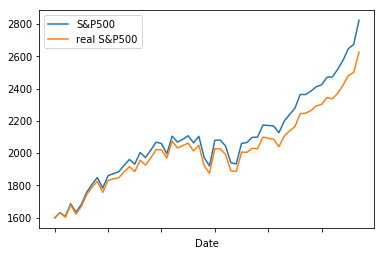

In [22]:
df_out = calc_real_return(df)
df_out[['S&P500','real S&P500']].plot()
plt.show()